# Dimensionality reduction with Principal Component Analysis and Linear Discriminant Analysis

Dimensionality Reduction is the process of simplifying data by selecting or extracting essential variables, and PCA and LDA are two significant algorithms used for this purpose.

## Dataset
### Context
Wine Dataset.
### Content
<li>Alcohol: Wine's alcohol content (percentage)</li>
<li>Malic acid: Tartness-contributing acid</li>
<li>Ash: Inorganic mineral content</li>
<li>Alcalinity of ash: Ash's alkalinity level</li>
<li>Magnesium: Minor mineral influence</li>
<li>Total phenols: Sum of wine's phenolic compounds</li>
<li>Flavanoids: Flavor and color compounds</li>
<li>Nonflavanoid phenols: Non-flavor phenolic compounds</li>
<li>Proanthocyanins: Bitterness and structure factors</li>
<li>Color intensity: Color depth and concentration</li>
<li>Hue: Dominant color shade</li>
<li>OD280/OD315 of diluted wines: Clarity and stability indicator</li>
<li>Proline: Amino acid content</li>
<li>Customer_Segment: Customer segment</li>

## What is Principal Component Analysis (PCA) ?

**Principal Component Analysis (PCA)** is a technique used to simplify complex data by finding a new set of variables (principal components) that capture the most important information. It reduces data dimensionality while preserving data patterns, making it useful for data compression, visualization, and noise reduction.

## What is Linear Discriminant Analysis (LDA) ?

**Linear Discriminant Analysis (LDA)** is a dimensionality reduction technique primarily used in the context of supervised classification. Unlike PCA, which focuses on maximizing variance, LDA aims to find a lower-dimensional representation of data that maximizes the separation between different classes or groups.

**Linear Discriminant Analysis (LDA)** is a dimensionality reduction method that identifies linear combinations of variables to maximize the distinction between different classes or categories in the data. It's commonly used in classification tasks to reduce dimensionality while enhancing class separability, making it a valuable tool for pattern recognition and classification algorithms.

# Libraries

Please install the following dependencies using pip install:


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## ML Data Understanding

In [120]:
df = pd.read_csv("wine.csv", sep=",")

In [121]:
display(df)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


## ML Data Engineering

In [122]:
# Feature metric.
X = df.iloc[:, 0:13].values

# Dependent variable.
y = df.iloc[:, 13].values

## ML Model Engineering

In [123]:
# Train-Test Split using 80% of the data in the train dataset and the rest 20% in the test dataset.
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, test_size = 0.2, random_state=0)

In [124]:
# Standardize the train and test data.
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

 Plain Logistic Regression Application

In [125]:
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

With PCA Logistic Regression Application

In [126]:
# Use two components.
pca = PCA(n_components = 2)
X_trainPCA = pca.fit_transform(X_train)
X_testPCA = pca.transform(X_test)

In [127]:
modelPCA = LogisticRegression(random_state = 0)
modelPCA.fit(X_trainPCA, y_train)
y_predPCA = modelPCA.predict(X_testPCA)

With LDA Logistic Regression Application

In [128]:
# Use two components.
lda = LDA(n_components = 2)
X_train_LDA = lda.fit_transform(X_train, y_train)
X_test_LDA = lda.transform(X_test)

In [129]:
modelLDA = LogisticRegression(random_state = 0)
modelLDA.fit(X_train_LDA, y_train)
y_predLDA = modelLDA.predict(X_test_LDA)

## ML Model Evaluation

In [130]:
# Confusion matrices.
cm_plain = confusion_matrix(y_test, y_pred)
cm_pca = confusion_matrix(y_test, y_predPCA)
cm_lda = confusion_matrix(y_test, y_predLDA)

 Plain Logistic Regression Application

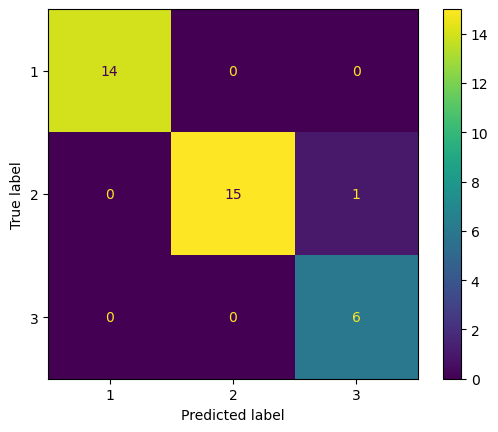

In [131]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_plain, display_labels=model.classes_)
disp.plot()

In [132]:
# The metrics.
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average=None)
sensitivity_recall = metrics.recall_score(y_test, y_pred, average=None)
specificity = metrics.recall_score(y_test, y_pred, average=None)
F1_score = metrics.f1_score(y_test, y_pred, average=None)
print(f'accuracy:{accuracy}, precision:{precision}, sensitivity_recall:{sensitivity_recall}, specificity:{specificity}, F1_score:{F1_score}')

accuracy:0.9722222222222222, precision:[1.         1.         0.85714286], sensitivity_recall:[1.     0.9375 1.    ], specificity:[1.     0.9375 1.    ], F1_score:[1.         0.96774194 0.92307692]


With PCA Logistic Regression Application

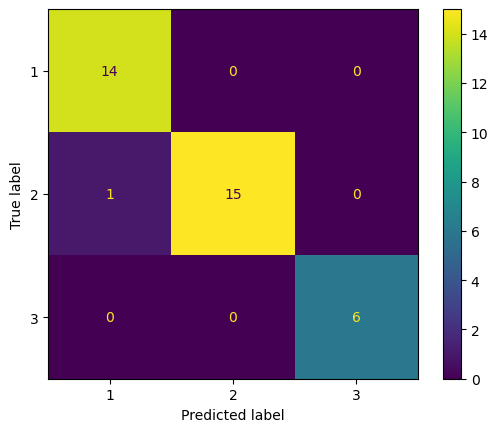

In [133]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_pca, display_labels=modelPCA.classes_)
disp.plot()

In [134]:
# The metrics.
accuracy = metrics.accuracy_score(y_test, y_predPCA)
precision = metrics.precision_score(y_test, y_predPCA, average=None)
sensitivity_recall = metrics.recall_score(y_test, y_predPCA, average=None)
specificity = metrics.recall_score(y_test, y_predPCA, average=None)
F1_score = metrics.f1_score(y_test, y_predPCA, average=None)
print(f'accuracy:{accuracy}, precision:{precision}, sensitivity_recall:{sensitivity_recall}, specificity:{specificity}, F1_score:{F1_score}')

accuracy:0.9722222222222222, precision:[0.93333333 1.         1.        ], sensitivity_recall:[1.     0.9375 1.    ], specificity:[1.     0.9375 1.    ], F1_score:[0.96551724 0.96774194 1.        ]


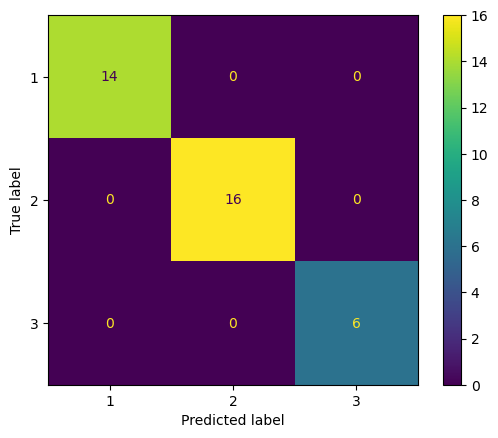

In [135]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lda, display_labels=modelLDA.classes_)
disp.plot()

In [136]:
# The metrics.
accuracy = metrics.accuracy_score(y_test, y_predLDA)
precision = metrics.precision_score(y_test, y_predLDA, average=None)
sensitivity_recall = metrics.recall_score(y_test, y_predLDA, average=None)
specificity = metrics.recall_score(y_test, y_predLDA, average=None)
F1_score = metrics.f1_score(y_test, y_predLDA, average=None)
print(f'accuracy:{accuracy}, precision:{precision}, sensitivity_recall:{sensitivity_recall}, specificity:{specificity}, F1_score:{F1_score}')

accuracy:1.0, precision:[1. 1. 1.], sensitivity_recall:[1. 1. 1.], specificity:[1. 1. 1.], F1_score:[1. 1. 1.]


## References

https://chat.openai.com/<br>
https://www.kaggle.com/code/murats/pca-and-lda-dimensional-reduction-on-wine-dataset/input<br>
https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering